In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [19]:
X, Y = mnist['data'], mnist['target']
X.shape, Y.shape

((70000, 784), (70000,))

In [20]:
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

In [23]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [27]:
import numpy as np
np.random.seed(0)

shuffle_index = np.random.permutation(60000)
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]

In [28]:
shuffle_index

array([ 3048, 19563, 58303, ..., 42613, 43567,  2732])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=1, weights='distance',
                              n_neighbors=4)
knn_clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=4, p=2,
                     weights='distance')

In [33]:
knn_pred = knn_clf.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, knn_pred)

0.9714

## Bagging, Adaboost, Random Forest 앙상블

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ensemble classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [36]:
from sklearn.datasets import make_moons

X, Y = make_moons(n_samples=500, noise=0.30, random_state=42)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [45]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
bag_clf.fit(X_train, Y_train)
y_pred_bag = bag_clf.predict(X_test)

In [40]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)
y_pred_tree = tree_clf.predict(X_test)

In [41]:
rf_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1,
    random_state=42
)
rf_clf.fit(X_train, Y_train)
y_pred_rf = rf_clf.predict(X_test) 

In [42]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm='SAMME.R',
    learning_rate=0.5,
    random_state=42
)
ada_clf.fit(X_train, Y_train)
y_pred_ada = ada_clf.predict(X_test)

In [46]:
# 한 눈에 보기 쉽게 비교
x_labels = ['Bag', 'Tree', 'RF', 'Ada']
# y_factors = [bag_clf, tree_clf, rf_clf, ada_clf]
y_predicts = [y_pred_bag, y_pred_tree, y_pred_rf, y_pred_ada]

In [49]:
y_accuracy = [accuracy_score(Y_test, y_predicts[i]) for i in range(len(y_predicts))]

In [53]:
y_acc = list(map(lambda x:round(x*100, 2), y_accuracy))
y_acc

[90.4, 85.6, 91.2, 89.6]

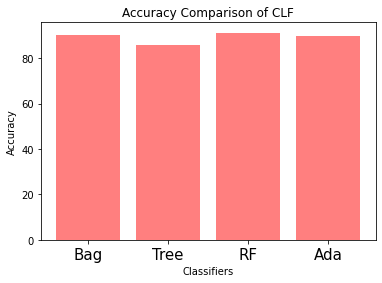

Accuracy : [0.904, 0.856, 0.912, 0.896]


In [82]:
plt.bar(np.arange(len(y_acc)), y_acc,
       color='red',
       alpha=0.5)
plt.title('Accuracy Comparison of CLF')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(y_acc)), x_labels, fontsize=15)
plt.show()
print(f'Accuracy : {y_accuracy}')

## 앙상블을 이용하면 어떻게 달라질까?

In [84]:
bag_clf_with_tree = BaggingClassifier(
    DecisionTreeClassifier(splitter="random",
                          max_leaf_nodes=16,
                          random_state=42),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
bag_clf_with_tree.fit(X_train, Y_train)
y_pred_bag_tree = bag_clf_with_tree.predict(X_test)

In [89]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

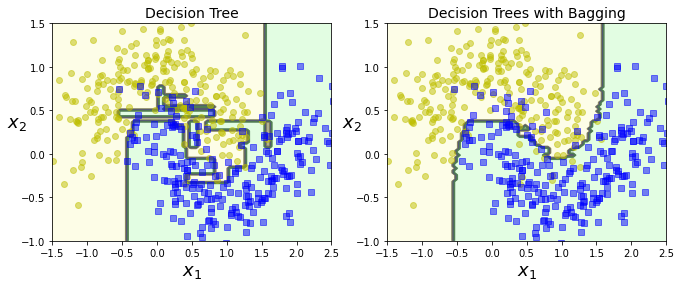

In [92]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, Y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, Y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

In [93]:
ada_clf_with_tree = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm='SAMME.R',
    learning_rate=0.5,
    random_state=42
)
ada_clf_with_tree.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [97]:
print(f'Accuracy of Ensemble(Bag, Tree): {accuracy_score(Y_test, y_pred_bag_tree)}')
print(f'Accuracy of Ensemble(Ada, Tree): {accuracy_score(Y_test, ada_clf_with_tree.predict(X_test))}')

Accuracy of Ensemble(Bag, Tree): 0.92
Accuracy of Ensemble(Ada, Tree): 0.896


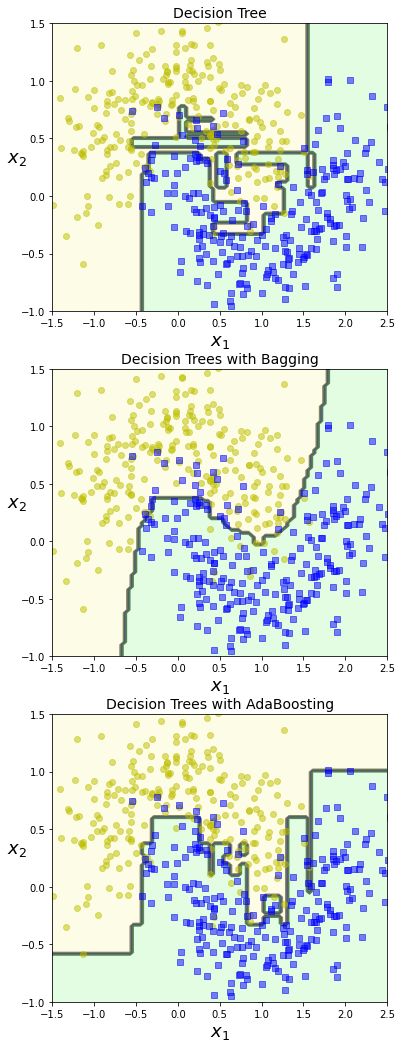

In [112]:
plt.figure(figsize=(6,18))
plt.subplot(311)
plot_decision_boundary(tree_clf, X, Y)
plt.title("Decision Tree", fontsize=14)

plt.subplot(312)
plot_decision_boundary(bag_clf_with_tree, X, Y)
plt.title("Decision Trees with Bagging", fontsize=14)

plt.subplot(313)
plot_decision_boundary(ada_clf_with_tree, X, Y)
plt.title("Decision Trees with AdaBoosting", fontsize=14)
plt.show()